<a href="https://colab.research.google.com/github/SeongYunHong/Mirae-Python_machine_learning/blob/main/13_TreeModel_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digital Transformation(DX)
* 상황인지
  * 회고 : hindsight
  * 통찰 : insight
  * 예지 : foresight
  * 관리감독 : oversight
* 의사결정
  * 예측 : 재고예측
  * 최적화 : 공정의 최적 선택

Tree 분석
* 이진트리를 이용해서 분할
* 분할의 척도 : 정보 이득(불순도(entropy, gini, chisqu))
* 종류
  * DT(Decision Tree)
  * RF(Random forest)
  * Adaboost
  * Gradient boost
  * XGboost
  * LightBGM
  * Catboost(Deeplearning : tensorflow)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#파이프라인 변동화
#전처리와 모델을 연결한 통로
#PolynomialFeatures transformation : 다차원으로 변환
#hyper parameter tuning을 하려면 매개변수 조합이 변경이 되어야
def PolynomialRegression(degress=2,**kwargs): #* : list, ** : dict #하나의 값으로 fixㅅ
  return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

In [ ]:
import numpy as np
def make_data(N,err=1.,rseed=1):
  rng=np.random.RandomState(rseed)
  X=rng.rand(N,1)**2 #scikits에서 X는 2차원이 되어야함
  y=10-1./(X.ravel()+0.1) #다차원을 1차원으로 만들 때 사용하는 것들 : ravel, flatten, reshape
  if err>0: #err이 0보다 크면 노이즈 붙여라
    y+=err*rng.randn(N) #노이즈
  return X,y
X,y=make_data(40)
print(type(X))

<class 'numpy.ndarray'>


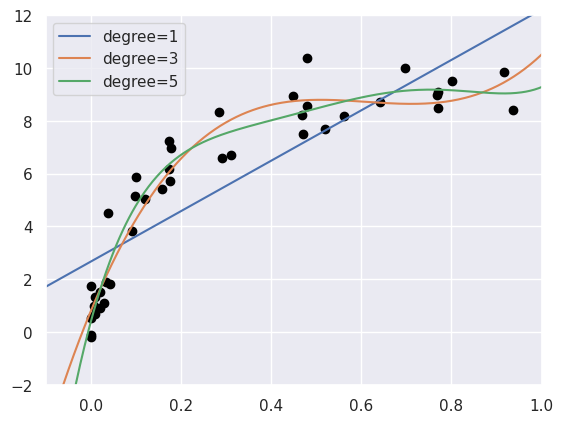

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
X_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y,color='black') #그래프는 1차원이여야함
axis=plt.axis()
for degree in [1,3,5]: #비선형회
  y_test=PolynomialRegression(degree).fit(X,y).predict(X_test)
  plt.plot(X_test.ravel(),y_test,label='degree={0}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')
plt.show()

In [ ]:
#GridSearchCV : hyper parametere tuning
from sklearn.model_selection import GridSearchCV
#경우의 수 : grid 21 * 2 = 42가지 경우의 수 발
param_grid={'polynomialfeatures__degree':np.arange(21), #0~20차 방정식까지 넣어줌
            'linearregression__fit_intercept':[True,False]}
#최적의 파라미터 조합            4           false
#pipeline
grid=GridSearchCV(PolynomialRegression(),param_grid,cv=7) #cross vaildation : 교차검증 #7번 교차검증
#cross vaildation을 하는 이유 : 재수없음(데이터가 균등하게 나눠지지 않았을 때)을 방지하기 위해서 모두가 한번은 테스트에 참여하도록
grid.fit(X,y)
#42 * 7 = 294번 실행하면서 최적의 파라미터를 찾음

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=5)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [ ]:
#최적의 파라미터 값 확인
#계산된 값들을 확인할땐 항상 _(언더 바)가 붙어있음
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00173232, 0.00178245, 0.00173279, 0.00131706, 0.00136444,
        0.00135303, 0.00135667, 0.00137258, 0.00140936, 0.00137922,
        0.00136491, 0.00135534, 0.00144717, 0.00206958, 0.0024788 ,
        0.00303752, 0.00251923, 0.00233248, 0.0025568 , 0.00247131,
        0.00236481, 0.0015127 , 0.00235438, 0.00205251, 0.00204614,
        0.00299512, 0.00207697, 0.00131314, 0.0012563 , 0.00129168,
        0.00125977, 0.00126157, 0.00127435, 0.00137721, 0.00135044,
        0.00129066, 0.00134781, 0.00130446, 0.00131471, 0.00137912,
        0.00131164, 0.00130905]),
 'std_fit_time': array([2.80216431e-04, 3.53866287e-04, 5.22967094e-04, 7.74499713e-05,
        7.74652777e-05, 2.45870218e-05, 4.47159866e-05, 4.79245914e-05,
        2.29121953e-05, 4.28347415e-05, 3.83578646e-05, 6.45512322e-05,
        1.44208835e-04, 4.23161706e-04, 6.74015243e-05, 9.48632894e-04,
        3.94877700e-04, 1.92185042e-04, 2.44434480e-04, 4.90440499e-05,
        6.07814041e-05, 6.201

In [ ]:
grid.best_score_

0.8972710305736532

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

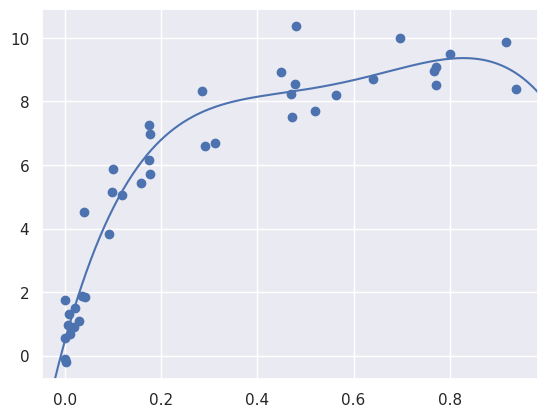

In [ ]:
model=grid.best_estimator_
plt.scatter(X.ravel(),y)
lim=plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

graphviz, pydot, libgraphviz-dev, pkg-config

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score #모든 모델에는 score함수가 있음(일반화 함수)
from sklearn import tree
import matplotlib.pyplot as plt
#가지치기 pruing
#min_samples_split : 나눌 때의 최소한의 개수(만약 4개라면) +> 3/1
clf=tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=3, max_leaf_nodes=4)# min_samples_split=3 )#,max_depth=4)
iris=load_iris() #Bunch 데이터타입

[Text(0.4, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.2, 0.125, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.6, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.8, 0.375, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

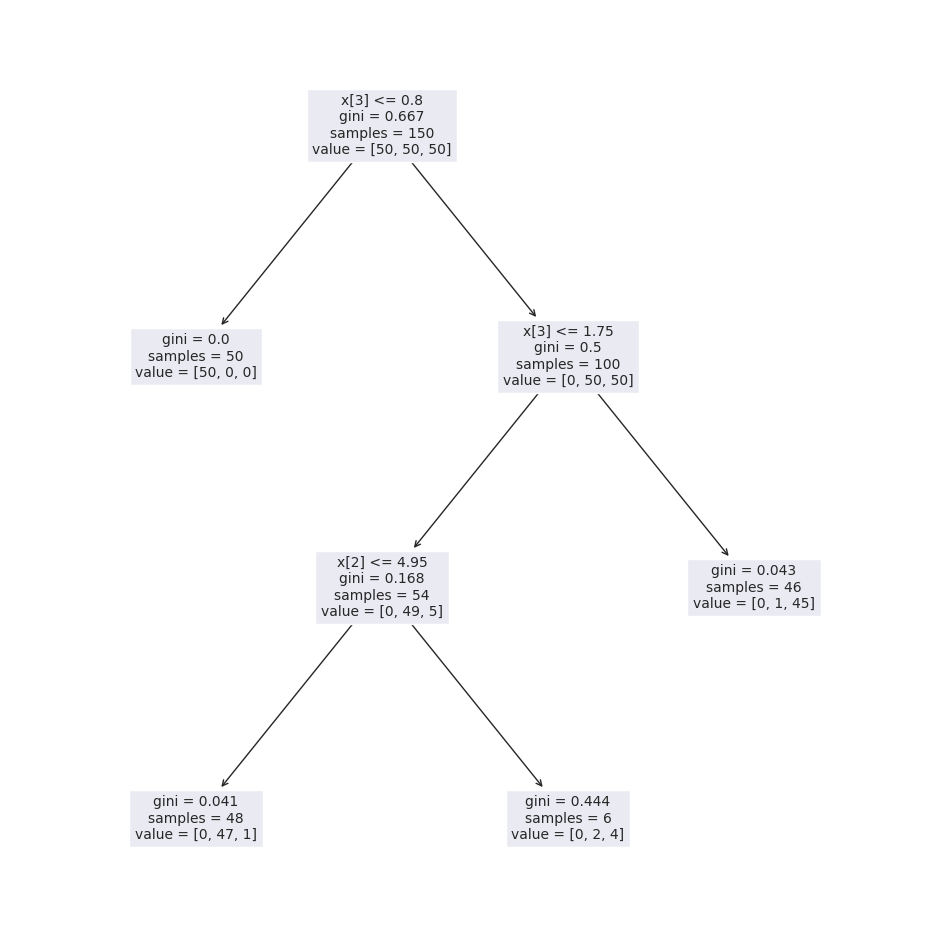

In [ ]:
fig,ax=plt.subplots(figsize=(12,12))
clf=clf.fit(iris.data,iris.target) #독립변수 종속변수
tree.plot_tree(clf,max_depth=5,fontsize=10) #일반 함수(매개변수 트리 모델)

In [ ]:
1-((50/150)*(50/150) + (50/150)*(50/150) + (50/150)*(50/150)) #0.6666666666666667

0.6666666666666667

In [ ]:
1-((50/50)*(50/50) + (0/50)*(0/50) + (0/50)*(0/50))

0.0

In [ ]:
1-((0/100)*(0/100) + (50/100)*(50/100) + (50/100)*(50/100))

0.5

In [ ]:
clf.get_depth() #5(루트 제외)

3

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
#평가 일반화함수
#cross_val_score(모델이름, 종속변수, 독립변수, cv)
cross_val_score(clf,iris.data,iris.target,cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#suppoort vector con
#support vector classifier 데이터의 경계선
#신경망은 나눠지면 그대로 끝인데 경계선과 경계선 사이의 최적 분할선을 찾아줌
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pandas as pd

winedf=pd.read_csv('/content/drive/MyDrive/mirae/csv/winequality-red.csv',sep=";")
print(winedf.head(3))
X=winedf.drop(['quality'],axis=1)
Y=winedf['quality'] #종속변수(와인의 품질평가)
#변수를 동일하게(분산의 사이즈를 동일하게) 대접하기 위해 정규화
steps=[('scaler',StandardScaler()),('SVM',SVC())] #명명식
#make_pipeline : 함수
#Pipeline : 클래스
pipeline=Pipeline(steps)
#과적합을 방지하는 규제 : C   #초평면의 모량을 제어 : gamma
parameteres={'SVM__C':[7,8,9,10,11],'SVM__gamma':[0.1,1,0.01]}
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y) #stratify : 충화표본 추출(클래스(분류종류)의 비율을 같게(train/test))
grid=GridSearchCV(pipeline,param_grid=parameteres,cv=6)
grid.fit(X_train,y_train)
print("score = %3.2f"%(grid.score(X_test,y_test)))
print(grid.best_params_)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
score = 0.67
{'SVM__C': 7, 'SVM__gamma': 1}


In [ ]:
#문제
#accuracy_score, cross_val_score로 평가하시오
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

prediction=grid.predict(X_test)
print(accuracy_score(y_test,prediction)) #실제값 , 예측값
#cv가 hyper parameter역할을 수행함 -> tuning해줘야
cross_val_score(grid,X_test,y_test,cv=2) #X , y값 #==모델,score()과 같음

0.671875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


array([0.5625, 0.5875])

In [ ]:
#문제
#충화추출한 결과인 train/test의 비율을 확인하시오
import pandas as pd
pd.Series(y_train).value_counts(normalize=True)

5    0.426114
6    0.398749
7    0.124316
4    0.032838
8    0.011728
3    0.006255
Name: quality, dtype: float64

In [ ]:
pd.Series(y_test).value_counts(normalize=True)

5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64

보스턴 집값

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})



import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
title =  ['CRIM','ZN','INDUS','CHAS', 'NOX','RM','AGE','RAD', 'TAX','PTRATIO',
          'B', 'LSTAT', 'medv']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns = title )
boston_df.head()

Selecting previously unselected package fonts-nanum.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
<class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
X=boston_df.iloc[:,:12]
print(X.shape)
Y=boston_df.iloc[:,12]
Y.shape

(506, 12)


(506,)

In [ ]:
#랜덤포레스트 탄생 배경 : DT의 과적합, 열 순서를 변경하면 결과가 변경 문제를 해결하기 위해 RF등장
#DT를 base_estimator로 한다
#특징 : feature importance가 출력되고
#out of bag : 선택되지 못한 데이터들 -> 평가하는 것이 oob_score
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(oob_score=True) #여러개의 모델, basic : DT
rf.fit(X,Y)

RandomForestRegressor(oob_score=True)

In [ ]:
rf.feature_importances_

array([0.13278185, 0.00130977, 0.15949895, 0.00244499, 0.05084275,
       0.26469002, 0.22196145, 0.08464159, 0.00585869, 0.01214454,
       0.01760797, 0.04621744])

In [ ]:
sorted(zip(map(lambda x: round(x,2), rf.feature_importances_),title),reverse=True)

[(0.26, 'RM'),
 (0.22, 'AGE'),
 (0.16, 'INDUS'),
 (0.13, 'CRIM'),
 (0.08, 'RAD'),
 (0.05, 'NOX'),
 (0.05, 'LSTAT'),
 (0.02, 'B'),
 (0.01, 'TAX'),
 (0.01, 'PTRATIO'),
 (0.0, 'ZN'),
 (0.0, 'CHAS')]

Text(0.5, 1.0, 'feature_importances')

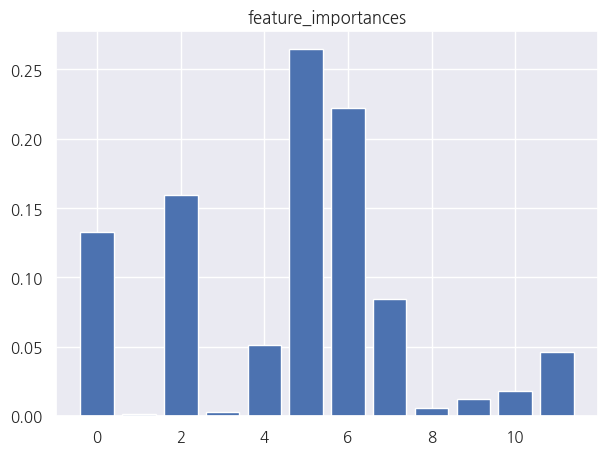

In [ ]:
import matplotlib.pyplot as plt
f, ax=plt.subplots(figsize=(7,5))
ax.bar(range(0,len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('feature_importances')

In [ ]:
rf.oob_score_

0.7026950543585517

<Axes: >

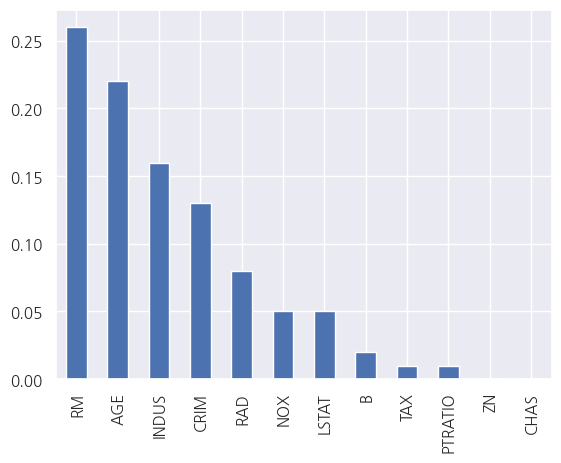

In [ ]:
#문제
#정렬하고 컬럼이름을 같이 출력하시오

import pandas as pd
res=pd.Series(map(lambda x: round(x,2), rf.feature_importances_),index=title[:12])
res=res.sort_values(ascending=False)
res.plot(kind='bar')

In [ ]:
rf.score(X,Y)

0.9613017350492409

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error

Mean Squared Error

In [ ]:
pred=rf.predict(X)
mean_squared_error(Y,pred) # == np.sum((Y-pred)**2 / len(Y))

1.9695086973517808

Mean Absolute Error

In [ ]:
mean_absolute_error(Y,pred) # == np.sum(np.abs((Y-pred))/len(Y))

0.9371596837944667

r2_score(결정계수 : 회귀제곱합/(회귀제곱합 + 잔차제곱합))

* 회귀제곱합 = (에측값 - 평균)
* 잔차제곱합 = (실제값 - 예측값)
* 총제곱합
* 회귀제곱합 / 총제곱합
* 1-(잔차제곱합 / 총제곱합)

In [ ]:
r2_score(Y,pred) #r2_score(실제값,예측값)
mean_real=np.mean(Y)

reg_sum=np.sum((pred-mean_real)**2 / len(Y))
print(np.sum((pred-mean_real)**2 / len(Y))) #회귀제곱합
res_sum=np.sum((Y-mean_real)**2 / len(Y))
print(np.sum((Y-mean_real)**2 / len(Y)))    #잔차제곱합
reg_sum/(reg_sum + res_sum) #결정계수
1-(reg_sum + res_sum)

42.32815573570574
50.89397935173179


-92.22213508743752

In [ ]:
def r2_score(y_true,y_pred):
    mean_y_true=np.mean(y_true)
    ssr=np.sum((y_true - y_pred)**2)      #잔차제곱합
    sst=np.sum((y_true - mean_y_true)**2) #총제곱합
    #sse=np.sum((y_pred - np.mean(y_true))**2)
    r2=1-(ssr/sst)
    return r2
r2_score(Y,pred)

0.9613017350492409

In [ ]:
#회귀제곱합
ssr=np.sum((Y-pred)**2)
sse=np.sum((pred-np.mean(Y)))
sse/(ssr+sse)

0.003319164441399491

BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#booststrap(중복을 허용하면서 데이터를 랜덤으로 선택 - 새로운 조합이 가능) + aggregation
#분류(투표) 회귀(평균)
bag_clf=BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=10, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42) #base model
bag_clf.fit(X_train, y_train)
y_pred=bag_clf.predict(X_test)
print('Accuracy : ',accuracy_score(y_test,y_pred)) #범용함수

Accuracy :  0.578125


In [ ]:
param_grid={'estimator__max_depth':[3,4,5,6], #pruning 가지치기, regularation 규제
            'max_samples':[0.01,0.05,0.1,0.2]}
clf=GridSearchCV(BaggingClassifier(DecisionTreeClassifier(random_state=42),
                                   n_estimators=10, max_samples=100,bootstrap=True, n_jobs=-1,
                                   random_state=42,max_features=0.5),
                 param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                         max_features=0.5, max_samples=100,
                                         n_jobs=-1, random_state=42),
             param_grid={'estimator__max_depth': [3, 4, 5, 6],
                         'max_samples': [0.01, 0.05, 0.1, 0.2]})

In [ ]:
clf.best_params_

{'estimator__max_depth': 4, 'max_samples': 0.2}

In [ ]:
#3가지로 구성되어 있음(model, estimator, parameter)
#다른 모델들은 2가지로 구성되어 있음(모델 + 파라미터)
model={'model':BaggingClassifier,
       'kwargs':{'estimator':DecisionTreeClassifier()}, #배경의 파라미터
       'parameters':{ #DT의 파라미터
          'name__estimator__max_depth':[3,4,5,6],
          'name__estimator__max_leaf_nodes':[10,20,30]
       }}
                   #구별되는 이름 : name
pipeline=Pipeline([('name',model['model'](**model['kwargs']))]) #별표 찢어서 넣어라
cv_model=GridSearchCV(pipeline, param_grid=model['parameters'],cv=5)
cv_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('name',
                                        BaggingClassifier(estimator=DecisionTreeClassifier()))]),
             param_grid={'name__estimator__max_depth': [3, 4, 5, 6],
                         'name__estimator__max_leaf_nodes': [10, 20, 30]})

In [ ]:
#모델 저장
from sklearn import svm
from sklearn import datasets
clf=svm.SVC()
X,y=datasets.load_iris(return_X_y=True)
clf.fit(X,y)
import pickle #파일을 저장할 때 사용
file=open('important','wb') #모드 w : write, b : binary #binary mode로 write
pickle.dump(clf,file) #메모리 그대로 저장
file.close() #오픈했으면 무조건 클로즈 있어야함

In [ ]:
file=open('important','rb') #  r : read #binary mode로 read
clf2=pickle.load(file)

In [ ]:
#문제
#iris 데이터를 로딩
#데이터 분할(train, test)
#사전에 모델학습이 이뤄져야함(RF)
#변수중요도부터 SelectFromModel 함수를 사용해서 변수 선택(threshold=0.15%)이상만 선택
#RF를 이용하여 분류한 다음 분류 정확도를 평가하시오
#변수 중요도를 시각화하시오
#파일로 저장하고 로딩한 다음에 테스트에 대하여 평가하시오

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import pickle

#iris 데이터를 로딩
iris=load_iris()
X,y=datasets.load_iris(return_X_y=True)
title=['sepal length','sepal width','petal length','petal width']

#데이터 분할(train, test)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=30,stratify=y)

#사전에 모델학습이 이뤄져야함(RF)
rf=RandomForestClassifier(n_estimators=20, max_depth=5, random_state=1)
rf.fit(X_train,y_train)

#변수중요도부터 SelectFromModel 함수를 사용해서 변수 선택(threshold=0.15%)이상만 선택
sfm = SelectFromModel(rf, threshold = 0.15, prefit = True)
X_train_Select = sfm.transform(X_train)
X_test_Select  = sfm.transform(X_test)
rf.fit(X_train_Select,y_train)


#RF를 이용하여 분류한 다음 분류 정확도를 평가하시오
pred=rf.predict(X_test_Select)
print("score : ",rf.score(X_test_Select,y_test))
print("acc : ",accuracy_score(y_test, pred))
print("cv : ",cross_val_score(rf,X_test_Select,y_test,cv=4))

#변수 중요도를 시각화하시오
f, ax=plt.subplots(figsize=(7,5))
ax.barh(range(0,len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('feature_importances')

#파일로 저장하고 로딩한 다음에 테스트에 대하여 평가하시오
file=open('iris_rf','wb')
pickle.dump(rf,file)
file.close()

file=open('iris_rf','rb') #  r : read #binary mode로 read
iris_rf=pickle.load(file)

pred=rf.predict(X_test_Select)
print("score : ",rf.score(X_test_Select,y_test))
print("acc : ",accuracy_score(y_test, pred))
print("cv : ",cross_val_score(rf,X_test_Select,y_test,cv=4))

ValueError: ignored

In [ ]:
file=open('iris_rf','rb') #  r : read #binary mode로 read
iris_rf=pickle.load(file)
iris_rf

#pred=rf.predict(X_test_Select)
#print("score : ",rf.score(X_test_Select,y_test))
#print("acc : ",accuracy_score(y_test, pred))
#print("cv : ",cross_val_score(rf,X_test_Select,y_test,cv=4))

In [ ]:
print("Feature importances:", rf.feature_importances_)
X_train_Select = np.array(iris.feature_names)[sfm.get_support()]
print("Selected features:", X_train_Select)

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']